In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/telecom_churn_raw.csv")
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [3]:
df.shape

(243553, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [5]:
df.telecom_partner.unique()

array(['Reliance Jio', 'Vodafone', 'BSNL', 'Airtel'], dtype=object)

In [6]:
df.state.unique()

array(['Karnataka', 'Mizoram', 'Arunachal Pradesh', 'Tamil Nadu',
       'Tripura', 'Uttarakhand', 'Himachal Pradesh', 'Rajasthan',
       'Odisha', 'Uttar Pradesh', 'Chhattisgarh', 'Madhya Pradesh',
       'Manipur', 'Goa', 'West Bengal', 'Gujarat', 'Telangana',
       'Maharashtra', 'Haryana', 'Andhra Pradesh', 'Sikkim', 'Assam',
       'Jharkhand', 'Kerala', 'Punjab', 'Nagaland', 'Bihar', 'Meghalaya'],
      dtype=object)

In [7]:
df.city.unique()

array(['Kolkata', 'Mumbai', 'Delhi', 'Chennai', 'Hyderabad', 'Bangalore'],
      dtype=object)

In [8]:
state_localization = {
    # Bagmati Province (Urban, High Tech, Capital)
    'Karnataka': 'Bagmati', 'Maharashtra': 'Bagmati', 'Tamil Nadu': 'Bagmati', 
    'Telangana': 'Bagmati', 'Delhi': 'Bagmati', 'Goa': 'Bagmati',
    
    # Madhesh Province (Terai, High Population, Industrial)
    'Bihar': 'Madhesh', 'Uttar Pradesh': 'Madhesh', 'Andhra Pradesh': 'Madhesh',
    
    # Koshi Province (Eastern, Industrial & Hilly Mix)
    'West Bengal': 'Koshi', 'Sikkim': 'Koshi', 'Arunachal Pradesh': 'Koshi', 
    'Assam': 'Koshi', 'Nagaland': 'Koshi', 'Manipur': 'Koshi',
    
    # Gandaki Province (Tourism Hub, Hilly)
    'Punjab': 'Gandaki', 'Haryana': 'Gandaki', 'Gujarat': 'Gandaki', 'Tripura': 'Gandaki',
    
    # Lumbini Province (Mid-Terai, Plains)
    'Rajasthan': 'Lumbini', 'Madhya Pradesh': 'Lumbini', 'Chhattisgarh': 'Lumbini', 'Odisha': 'Lumbini',
    
    # Karnali Province (Remote, Mountainous)
    'Mizoram': 'Karnali', 'Himachal Pradesh': 'Karnali', 'Meghalaya': 'Karnali',
    
    # Sudurpashchim Province (Far-Western)
    'Uttarakhand': 'Sudurpashchim', 'Jharkhand': 'Sudurpashchim', 'Kerala': 'Sudurpashchim'
}


df['province'] = df['state'].map(state_localization)

In [9]:
# Create the mapping dictionary
provider_mapping = {
    'Airtel': 'Ncell',
    'Reliance Jio': 'Ncell',
    'BSNL': 'Nepal Telecom (NTC)',
    'Vodafone': 'Nepal Telecom (NTC)'
}

# Apply the mapping to your provider column
df['provider_nepal'] = df['telecom_partner'].replace(provider_mapping)

# Double check the result
print(df['provider_nepal'].value_counts())

provider_nepal
Ncell                  122028
Nepal Telecom (NTC)    121525
Name: count, dtype: int64


In [39]:
df1 = df.drop(['telecom_partner', 'state','city','pincode'], axis=1)

In [40]:
df1.isnull().sum()

customer_id             0
gender                  0
age                     0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
province                0
provider_nepal          0
dtype: int64

In [41]:
c =  0 
for i in df.data_used:
    if i > 0:
        c = c + 1

print(c)

237489


In [42]:
df1 = df1[df1.data_used >= 0 ]
df1

,customer_id,gender,age,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,province,provider_nepal
1,2,F,55,2020-01-01,2,130556,62,39,5973,0,Karnali,Ncell
2,3,F,57,2020-01-01,0,148828,49,24,193,1,Koshi,Nepal Telecom (NTC)
3,4,M,46,2020-01-01,1,38722,80,25,9377,1,Bagmati,Nepal Telecom (NTC)
4,5,F,26,2020-01-01,2,55098,78,15,1393,0,Gandaki,Nepal Telecom (NTC)
5,6,M,36,2020-01-01,1,73452,91,24,8109,0,Sudurpashchim,Nepal Telecom (NTC)
...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,F,28,2023-05-03,3,130580,28,9,4102,0,Karnali,Ncell
243549,243550,F,52,2023-05-03,0,82393,80,45,7521,0,Koshi,Ncell
243550,243551,M,59,2023-05-03,4,51298,26,4,6547,0,Gandaki,Ncell
243551,243552,M,49,2023-05-03,2,83981,80,15,1125,0,Lumbini,Nepal Telecom (NTC)


In [43]:
df1 = df1[df1.calls_made >= 0 ]
df1 = df1[df1.sms_sent >= 0 ]
df1

,customer_id,gender,age,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,province,provider_nepal
1,2,F,55,2020-01-01,2,130556,62,39,5973,0,Karnali,Ncell
2,3,F,57,2020-01-01,0,148828,49,24,193,1,Koshi,Nepal Telecom (NTC)
3,4,M,46,2020-01-01,1,38722,80,25,9377,1,Bagmati,Nepal Telecom (NTC)
4,5,F,26,2020-01-01,2,55098,78,15,1393,0,Gandaki,Nepal Telecom (NTC)
5,6,M,36,2020-01-01,1,73452,91,24,8109,0,Sudurpashchim,Nepal Telecom (NTC)
...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,F,28,2023-05-03,3,130580,28,9,4102,0,Karnali,Ncell
243549,243550,F,52,2023-05-03,0,82393,80,45,7521,0,Koshi,Ncell
243550,243551,M,59,2023-05-03,4,51298,26,4,6547,0,Gandaki,Ncell
243551,243552,M,49,2023-05-03,2,83981,80,15,1125,0,Lumbini,Nepal Telecom (NTC)


In [44]:
df1.describe()

,customer_id,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000
mean,121678.448479,46.075418,1.998607,85045.042114,50.490378,24.769269,5126.822960,0.200013
std,70299.046957,16.441448,1.414828,37521.056232,28.464511,14.202591,2851.962886,0.400010
min,2.000000,18.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000
25%,60822.250000,32.000000,1.000000,52576.250000,26.000000,13.000000,2674.000000,0.000000
50%,121598.500000,46.000000,2.000000,85008.000000,50.000000,25.000000,5108.000000,0.000000
75%,182549.750000,60.000000,3.000000,117553.000000,75.000000,37.000000,7555.000000,0.000000
max,243553.000000,74.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


<Axes: xlabel='calls_made'>

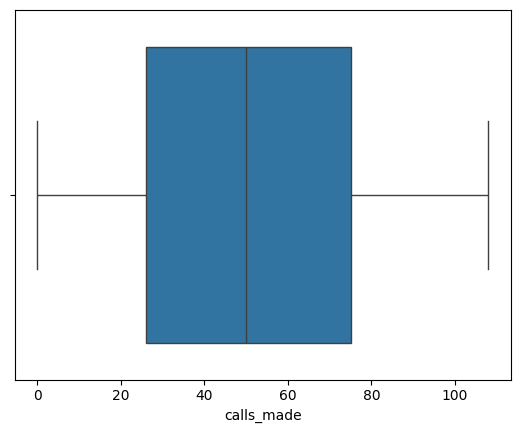

In [45]:
sns.boxplot(x=df1["calls_made"])

In [46]:
def det_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    list1 = df[(df[col] < lower) | (df[col] > upper)]
    print('list:',list1)
    # return list1

In [47]:
col = 'estimated_salary'
list1 = []

Q1 = df1[col].quantile(0.25)
Q3 = df1[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# for i in col:
#     out =  (df1[col] < lower) | (df1[col] > upper)
#     list1.append(out)
    
print(lower)
print(upper)
print('list1:',list1)

-44888.875
215018.125
list1: []


In [48]:
list2 = [i for i in df1['age'] if i < 18 ]
len(list2)

0

In [49]:
list3 = [i for i in df1[['sms_sent','calls_made','data_used']] if i == 0 ]
len(list3)

0

In [50]:
df1.nunique()

customer_id             223966
gender                       2
age                         57
date_of_registration      1220
num_dependents               5
estimated_salary        106777
calls_made                 109
sms_sent                    54
data_used                10910
churn                        2
province                     7
provider_nepal               2
dtype: int64

In [51]:
# Save as a new CSV so you don't lose the original raw data
df1.to_csv('../data/cleaned_churn_data.csv', index=False)
print("Data cleaning complete. Cleaned file saved to data/cleaned_churn_data.csv")

Data cleaning complete. Cleaned file saved to data/cleaned_churn_data.csv
